# CSC411 Assignment 1: Facial Recognition 
Disclaimer: This notebook will only be reproducible assuming you run them all consecutively. The markdowns in this notebooks are just notes that I made to myself for the final report. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import glob

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)

## Part 1 - Describing the Data
The code below illustrates three uncropped and cropped images from the dataset. Several observation points can be made regarding the dataset:
* The original images all vary in size.
* Faces do not always face the same direction. 
* Some original images have parts of the face cropped out (AlecBaldwin1.jpg) or covered (SteveCarell112.jpg)
* Bounding boxes are quite accurate, but they are not consistently centered, so face takes up a different number of pixels everytime.
* The cropped out faces can be more or less aligned with each other most of the time, except when the person is facing sideways. 


### Original images

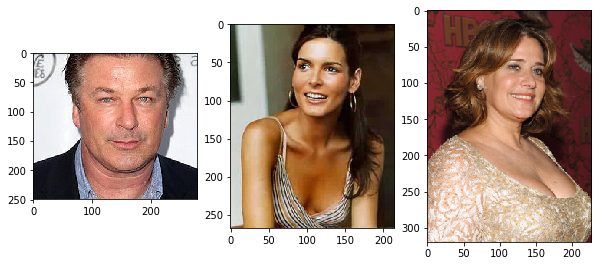

In [2]:
uncropped1_dir = "uncropped/AlecBaldwin1.jpg"
uncropped2_dir = "uncropped/AngieHarmon0.jpg"
uncropped3_dir = "uncropped/LorraineBracco0.jpg"
fig= plt.figure(figsize=(10, 10))

img = mpimg.imread(uncropped1_dir)
fig.add_subplot(1, 3, 1)
plt.imshow(img)

img = mpimg.imread(uncropped2_dir)
fig.add_subplot(1, 3, 2)
plt.imshow(img)

img = mpimg.imread(uncropped3_dir)
fig.add_subplot(1, 3, 3)
plt.imshow(img)

plt.show()

### Grayscaled

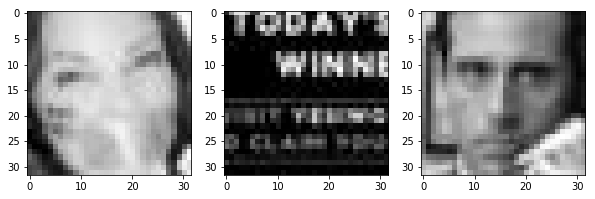

In [3]:
cropped1_dir = "cropped/female/FranDrescher109.jpg"
cropped2_dir = "cropped/male/BillHader4.jpg"
cropped3_dir = "cropped/male/SteveCarell112.jpg"
fig= plt.figure(figsize=(10, 10))

img = mpimg.imread(cropped1_dir)
fig.add_subplot(1, 3, 1)
plt.imshow(img, cmap='gray')

img = mpimg.imread(cropped2_dir)
fig.add_subplot(1, 3, 2)
plt.imshow(img, cmap='gray')

img = mpimg.imread(cropped3_dir)
fig.add_subplot(1, 3, 3)
plt.imshow(img, cmap='gray')

plt.show()

## Part 2 - Loading the Data
The code below illustrates how the data is split into three different sets for our machine learning task. If the number of images for a given actor were below 100, 80% of the actor's images went into the training set, while the rest were split evenly between the validation and test set. 

The acquisistion of data was performed using a separate script get_data.py which is included in the appendix. 

In [4]:
#global variables required for all load_dataset functions
female_actors = ['America Ferrera', 'Angie Harmon', 'Fran Drescher', 'Kristen Chenoweth', 'Lorraine Bracco', 'Peri Gilpin']
male_actors = ['Alec Baldwin', 'Bill Hader', 'Daniel Radcliffe', 'Gerard Butler', 'Michael Vartan', 'Steve Carell']

def scramble(X, Y):
    '''Scrambles two np arrays consistently
     Arguments:
    X -- numpy array
    Y -- numpy array
    
    Returns:
    X[p] -- scrambled version of X
    Y[p] -- scrambled version of Y
    '''
    #reset seed every time so that p is always the same and we get consistent scrambling
    np.random.seed(1) 
    p = np.random.permutation(X.shape[0])
    return X[p], Y[p]

def load_dataset(actors, training_set_size = 100):
    '''Prepare Training, test, and validation data 
    Arguments:
    actors -- list of actors we want to download pictures of 
    training_set_size -- desired training set size
    
    Returns:
    train_x_mat 
    validation_x_mat
    test_x_mat
    train_y
    validation_y
    test_y
    '''
    train_x = []
    train_y = []
    validation_x = []
    validation_y = []
    test_x = []
    test_y = []
    
    class_num = -1
    class_tot = len(actors)
    for act in actors:
        #get all files under person's name 
        if act in female_actors:
            files = glob.glob('cropped/female/' + ''.join(act.split()) + '*')
            np.random.shuffle(files)      
        elif act in male_actors:
            files = glob.glob('cropped/male/' + ''.join(act.split()) + '*')
            np.random.shuffle(files)
 
        #check to see if you have enough images for the split
        if len(files) < training_set_size:    
            training_size = int(len(files) * 0.8)
            validation_size = (len(files) - training_size)//2
            test_size = validation_size
            
            for i in range(len(files)):
                img = np.append((mpimg.imread(files[i])).flatten() * (1/255.0), 1.) #divide by 255 to normalize
                if i < training_size:
                    train_x.append(img)
                    train_y.append(class_num)
                elif i >= training_size and i < training_size + validation_size:
                    validation_x.append(img)
                    validation_y.append(class_num)
                elif i >= training_size + validation_size and i < training_size + 2*validation_size:
                    test_x.append(img)
                    test_y.append(class_num)

            class_num += 2
            continue
            
            
        for i in range(len(files)):
            img = np.append((mpimg.imread(files[i])).flatten() * (1/255.0), 1.) #divide by 255 to normalize
            if i < training_set_size:
                train_x.append(img)
                train_y.append(class_num)
            elif i >= training_set_size and i < training_set_size + 10:
                validation_x.append(img)
                validation_y.append(class_num)
            elif i >= training_set_size + 10 and i < training_set_size + 20:
                test_x.append(img)
                test_y.append(class_num)
        
        class_num += 2
        
    train_x_mat = np.vstack(train_x)
    validation_x_mat = np.vstack(validation_x)
    test_x_mat = np.vstack(test_x)

    train_y = np.array(train_y)
    train_y = train_y.reshape((train_y.shape[0], 1))
    
    validation_y = np.array(validation_y)
    validation_y = validation_y.reshape((validation_y.shape[0], 1))
    
    test_y = np.array(test_y, ndmin=1)
    test_y = test_y.reshape((test_y.shape[0], 1))
    
    #scramble data
    train_x_mat, train_y = scramble(train_x_mat, train_y)
    validation_x_mat, validation_y = scramble(validation_x_mat, validation_y)
    test_x_mat,test_y = scramble(test_x_mat,test_y)
    
    return train_x_mat,validation_x_mat,test_x_mat,train_y,validation_y,test_y

In [5]:
actors =['Alec Baldwin', 'Steve Carell']
train_x, validation_x, test_x, train_y, validation_y, test_y = load_dataset(actors, 100)

## Part 3 - Alec Baldwin vs. Steve Carell Classifier
The cost function used the linear regression classifier is the mean squared error cost function. It's cost function is denoted by 

$$J(\theta) = \frac{1}{2m} \sum_{i}^{m} (\theta^{T}X^{(i)} - Y^{(i)})^2$$

There are three main hyperparameters that had to be tuned for this task: the number of iterations we wish to run gradient descent, the learning rate of our algorithm and the initial weights for our algorithm. All of these hyperparameters were empirically found through trial and error.

I started off with a numpy array of zeros for my initial weights. From my initial testing, arbituary hyperparameters were used: I used a numpy array of zeros for my initial weights, iter_max of 200 and a learning rate of 0.01. This yeilded a validation accuracy of 50%, which was not ideal. As such, I increased the number of training iterations to 2000 and reran the training. With this increase, my cost grew to inf which signifies that my learning rate may have been too large. From there, I decreased it to 0.001 which gave me a test set acuracy of 96.5% validation accuracy of 85% In


At this point, my alogorithm was performing well on the classification task. To further optimize its value, I experimented with learning rates that were close 0.001±0.006. In the end, a learning rate of 0.004 yielded the optimal validation accuracy. To further prune my alogorithm, I tried to inrease the number of iterations I ran gradient descent for. Unfortunately, increasing the number of iterations seemed to cause severe overfitting of the training set while decreasing performance on the validation set. As such, I also experiment with decreasing the number of iterations. The ideal training iterations that struck a balance between performing well on both the training and validation set was approximately 1800 iterations. Random weights initialization of weights was also attempted, although it came with limited success. Note that every time I changed a hyperparameter, I reran the simulation.

Performance of final model on various datasets:
Training Set:  [ 0.99]
Validation Set:  [ 0.90]
Test Set:  [ 1.]

Cost function on the training and the validation sets are:
training set:  0.0767722076777,
validation set:  0.168704914045.

In [6]:
def gradient(X, Y, theta):
    '''
    Returns:
    gradient of cost function
    '''
    m = X.shape[0] #number of training examples
    return (1.0/float(m)) * np.dot(X.T, (np.dot(X, theta) - Y))

def cost(X, Y, theta):
    '''
    Returns:
    Computed cost for given weights
    '''
    m = X.shape[0] #number of training examples
    return (1.0/(2.0 * float(m))) * np.sum((np.dot(X, theta) - Y) **2 )

def fit(X, Y, init_theta, iter_max = 2000, learning_rate = 0.004, print_me = True):
    '''
    Performs linear regression with gradient descent
    '''
    eps = 1e-5
    prev_theta = init_theta - 10*eps
    theta = init_theta.copy()
    iter_num = 0
    past_weights = []
    
    while iter_num < iter_max:
        
        #prev_theta = theta.copy()
        grad = gradient(X, Y, theta)
        theta = theta - learning_rate * grad
        
        if iter_num % 500 == 0 and print_me:
            print "Iteration: ", iter_num
            print "Cost : ", cost(X, Y, theta)
            past_weights.append(theta)
        elif iter_num % 500 == 0:
            past_weights.append(theta)
        iter_num += 1
    
    if iter_num % 500 != 0 and print_me:
        print "Iteration: ", iter_num
        print "Cost : ", cost(X, Y, theta)
        past_weights.append(theta)
    elif iter_num % 500 != 0:
        past_weights.append(theta)
        
    return past_weights

def evaluate(X, Y, theta):
    pred = np.dot(X, theta)
    correct = 0
    for i in range(len(pred)):
        if abs(1 + pred[i]) > abs(pred[i] - 1): #if closer to 1 than -1
            correct += 1 * (Y[i] == 1)
        else:
            correct += 1 * (Y[i] == -1)
    return correct / float(len(pred))

In [7]:
#Cell used for initial testing (where init_theta, iter_max and learning_rate were all subject to change)
#Example of me starting to overfit by running too many iterations
actors =['Alec Baldwin', 'Steve Carell']
train_x, validation_x, test_x, train_y, validation_y, test_y = load_dataset(actors, 100)

init_theta = np.array([0.0] * train_x.shape[1]).reshape(train_x.shape[1],1)
past_weights = fit(train_x, train_y, init_theta, iter_max = 200, learning_rate = 0.005)
print 'Train Set Accuracy', evaluate(train_x, train_y, past_weights[-1])
print 'Validation Set Accuracy', evaluate(validation_x, validation_y, past_weights[-1])


Iteration:  0
Cost :  0.494792149145
Iteration:  200
Cost :  0.199059878004
Train Set Accuracy [ 0.945]
Validation Set Accuracy [ 0.85]


In [8]:
#Final Results
actors =['Alec Baldwin', 'Steve Carell']

train_x, validation_x, test_x, train_y, validation_y, test_y = load_dataset(actors, 100)

init_theta = np.array([0.0] * train_x.shape[1]).reshape(train_x.shape[1],1)
past_weights = fit(train_x, train_y, init_theta, iter_max = 1800, learning_rate = 0.004)
print 'Performance of final model on various datasets'
print 'Training Set: ', evaluate(train_x, train_y, past_weights[-1])
print 'Validation Set: ',evaluate(validation_x, validation_y, past_weights[-1])
print 'Test Set: ', evaluate(test_x, test_y, past_weights[-1])
print 'Cost with training set: ', cost(train_x, train_y, past_weights[-1])
print 'Cost with validation set: ', cost(validation_x, validation_y, past_weights[-1])

Iteration:  0
Cost :  0.495333245714
Iteration:  500
Cost :  0.139023258413
Iteration:  1000
Cost :  0.09927322369
Iteration:  1500
Cost :  0.0828197068671
Iteration:  1800
Cost :  0.0764248413307
Performance of final model on various datasets
Training Set:  [ 0.99]
Validation Set:  [ 0.9]
Test Set:  [ 1.]
Cost with training set:  0.0764248413307
Cost with validation set:  0.208043624382


## Part 4 - Visualizing Weights
a.) The cells below are visualizations of the thetas obtained from the machine learning task. The first cell visualizes the weights formed by the weights obtained in part 3, while the second cell visualizes the weights formed by using a training set that contains only two images of each actor. We see that the second visualization of weights generated clearly looks much more like a face than the first visualization. 

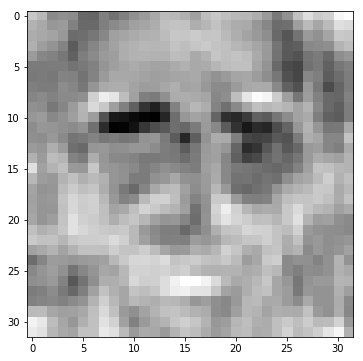

In [9]:
final_weight = past_weights[-1][:-1]
final_weight = final_weight.reshape((32,32))
plt.imshow(final_weight)
plt.show()

Iteration:  0
Cost :  0.457864967255
Iteration:  1
Cost :  0.457864967255


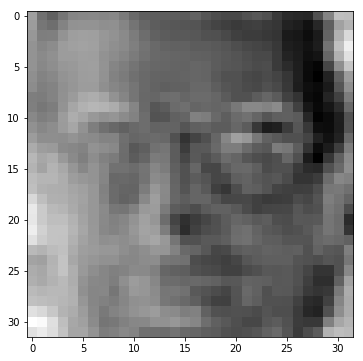

In [10]:
#Retrain the model
actors =['Alec Baldwin', 'Steve Carell']
train_x, validation_x, test_x, train_y, validation_y, test_y = load_dataset(actors, 100)

init_theta = np.array([0.0] * train_x.shape[1]).reshape(train_x.shape[1],1)
past_weights = fit(train_x[1:5,:], train_y[1:5,:], init_theta, iter_max = 1, learning_rate = 0.004)
#seeded so row 1 and row 2 are Alec Baldwin images and row 3 and row 4 are Steve Carell images

final_weight = past_weights[-1][:-1]
final_weight = final_weight.reshape((32,32))
plt.imshow(final_weight)
plt.show()

b.) The cell below visualizes the progression of the thetas overtime. As we can see overtime, the edges tend to fade and the image becomes far more diluted. The more iterations we run, the more the thetas will look like our first visualization in (a). The less iterations we run, the more the thetas will look like our second visualization in (a).

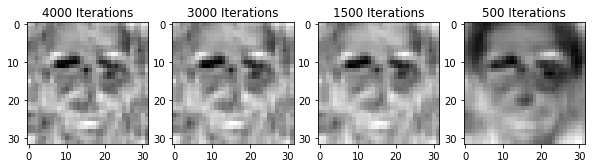

In [11]:
#Experimenting with training iterations
actors =['Alec Baldwin', 'Steve Carell']
train_x, validation_x, test_x, train_y, validation_y, test_y = load_dataset(actors, 100)

init_theta = np.array([0.0] * train_x.shape[1]).reshape(train_x.shape[1],1)
past_weights = fit(train_x[:,:], train_y[:,:], init_theta, iter_max = 4000, learning_rate = 0.004, print_me=False)

f, axarr = plt.subplots(1,4)

weight = past_weights[-1][:-1]
weight = weight.reshape((32,32))
axarr[0].imshow(weight)
axarr[0].set_title('4000 Iterations')

weight1 = past_weights[-3][:-1]
weight1 = weight1.reshape((32,32))
axarr[1].imshow(weight1)
axarr[1].set_title('3000 Iterations')

weight2 = past_weights[3][:-1]
weight2 = weight2.reshape((32,32))
axarr[2].imshow(weight2)
axarr[2].set_title('1500 Iterations')

weight3 = past_weights[0][:-1]
weight3 = weight3.reshape((32,32))
axarr[3].imshow(weight3)
axarr[3].set_title('500 Iterations')

plt.show()

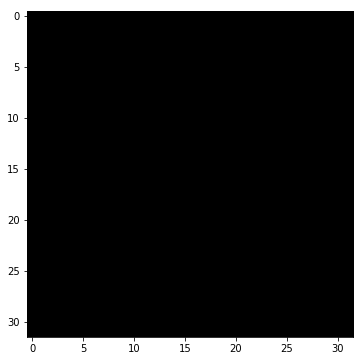

In [12]:
#visualizing weights of all zeros
init_theta = np.array([0.0] * train_x.shape[1]).reshape(train_x.shape[1],1)
init_theta = init_theta[:-1]
init_theta = init_theta.reshape((32,32))
plt.imshow(init_theta)
plt.show()

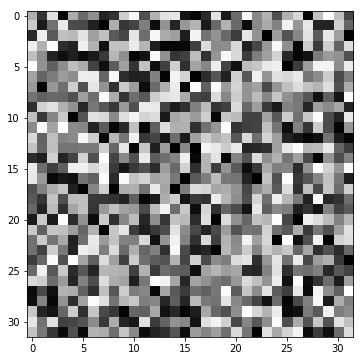

In [13]:
#visualizing random weights
init_theta = np.random.rand(32,32)
plt.imshow(init_theta)
plt.show()

## Part 5 - Overfitting
For the purposes of this part, we will have to modify our original load_dataset() function. 

In [14]:
def load_dataset_part5(actors, training_set_size = 100):
    '''Prepare Training, test, and validation data 
    Arguments:
    actors --
    training_set_size --
    '''
    train_x = []
    train_y = []
    validation_x = []
    validation_y = []
    test_x = []
    test_y = []
    
    class_tot = len(actors)
    for act in actors:
        #get all files under person's name 
        if act in female_actors:
            files = glob.glob('cropped/female/' + ''.join(act.split()) + '*')
            np.random.shuffle(files) 
            class_num = -1
        elif act in male_actors:
            files = glob.glob('cropped/male/' + ''.join(act.split()) + '*')
            np.random.shuffle(files)
            class_num = 1
        
        #check to see if you have enough images for the split
        if len(files) < training_set_size:    
            training_size = int(len(files) * 0.8)
            validation_size = (len(files) - training_size)//2
            test_size = validation_size
            
            for i in range(len(files)):
                img = np.append((mpimg.imread(files[i])).flatten() * (1/255.0), 1.) #divide by 255 to normalize
                if i < training_size:
                    train_x.append(img)
                    train_y.append(class_num)
                elif i >= training_size and i < training_size + validation_size:
                    validation_x.append(img)
                    validation_y.append(class_num)
                elif i >= training_size + validation_size and i < training_size + 2*validation_size:
                    test_x.append(img)
                    test_y.append(class_num)
            continue
            
        for i in range(len(files)):
            img = np.append((mpimg.imread(files[i])).flatten() * (1/255.0), 1.) #divide by 255 to normalize
            if i < training_set_size:
                train_x.append(img)
                train_y.append(class_num)
            elif i >= training_set_size and i < training_set_size + 10:
                validation_x.append(img)
                validation_y.append(class_num)
            elif i >= training_set_size + 10 and i < training_set_size + 20:
                test_x.append(img)
                test_y.append(class_num)
        
    train_x_mat = np.vstack(train_x)
    validation_x_mat = np.vstack(validation_x)
    test_x_mat = np.vstack(test_x)

    train_y = np.array(train_y)
    train_y = train_y.reshape((train_y.shape[0], 1))
    
    validation_y = np.array(validation_y)
    validation_y = validation_y.reshape((validation_y.shape[0], 1))
    
    test_y = np.array(test_y, ndmin=1)
    test_y = test_y.reshape((test_y.shape[0], 1))
    
    #scramble data
    train_x_mat, train_y = scramble(train_x_mat, train_y)
    validation_x_mat, validation_y = scramble(validation_x_mat, validation_y)
    test_x_mat,test_y = scramble(test_x_mat,test_y)
    
    return train_x_mat,validation_x_mat,test_x_mat,train_y,validation_y,test_y


The plot displayed by the cell below is a prime example of overfitting. From the plot we see that the training accuracy is far greater than the validation accuracy regardless of the training set size. This indicates that we are training our weights to fit the training set too well, so our weights do not perform well on instances outside of the training set. In this example we used 4000 training iterations, a learning rate of 0.001 and an initial theta of all zeros.

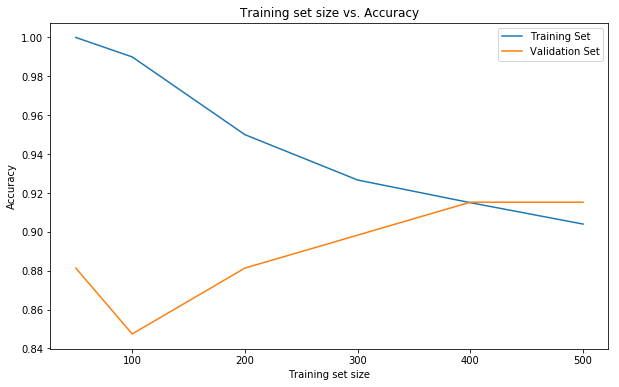

In [15]:
act =['Lorraine Bracco', 'Peri Gilpin', 'Angie Harmon', 'Alec Baldwin', 'Bill Hader', 'Steve Carell']
train_x, validation_x, test_x, train_y, validation_y, test_y = load_dataset_part5(act, 100)

arr = [50, 100, 200, 300, 400, 500]
train_performance = []
validation_performance = []
final_weights = []
for i in arr:
    init_theta = np.array([0.0] * train_x.shape[1]).reshape(train_x.shape[1],1)
    past_weights = fit(train_x[0:i,:], train_y[0:i,:], init_theta, 4000, learning_rate=0.001,print_me=False)
    train_performance.append(evaluate(train_x[0:i,:], train_y[0:i,:], past_weights[-1]))
    validation_performance.append(evaluate(validation_x, validation_y, past_weights[-1]))
    final_weights.append(past_weights[-1])

plt.plot(arr, train_performance, label='Training Set')
plt.plot(arr, validation_performance, label='Validation Set')
plt.title('Training set size vs. Accuracy')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The cell below illustrates the performance of our classifier on 6 actors that are not in act. We see a significant decrease in performance when tested on actors not in act. In fact the performance drops to 87.5% on the 6 actors not in act compared to approximately 99% accuracy that we were obtaining on the training set. 

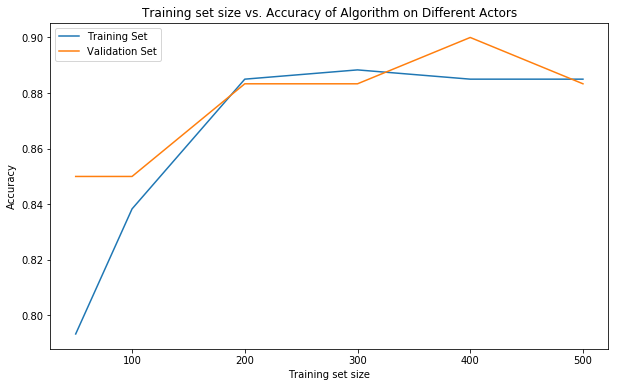

In [16]:
full_act = ['Lorraine Bracco', 'Peri Gilpin', 'Angie Harmon','Fran Drescher', 'America Ferrera', 'Kristin Chenoweth', 'Alec Baldwin', 'Bill Hader', 'Steve Carell', 'Gerard Butler', 'Daniel Radcliffe', 'Michael Vartan']
act =['Lorraine Bracco', 'Peri Gilpin', 'Angie Harmon', 'Alec Baldwin', 'Bill Hader', 'Steve Carell']
not_in_act = [] #actors not in act

for actor in full_act:
    if actor not in act:
        not_in_act.append(actor)
        
#Evaluate on the 6 actors on in act
train_x, validation_x, test_x, train_y, validation_y, test_y = load_dataset_part5(not_in_act, 100)

new_train =[]
new_validation =[]
for weight in final_weights:
    new_train.append(evaluate(train_x, train_y, weight))
    new_validation.append(evaluate(validation_x, validation_y, weight))

plt.plot(arr, new_train, label='Training Set')
plt.plot(arr, new_validation, label='Validation Set')
plt.title('Training set size vs. Accuracy of Algorithm on Different Actors')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Part 6 - Using One Hot Encoding

### Part C 
The implementation of the new cost and gradient function is given below

In [17]:
def cost_part6(X, Y, theta):
    m = float(X.shape[0])
    k = (1.0/(2.0*m))
    return k * np.sum((np.matmul(theta.T, X) - Y)**2)

def gradient_part6(X, Y, theta):
    m = float(X.shape[0])
    return (1.0/m) * np.matmul(X, (np.matmul(theta.T, X) - Y).T)

### Part D

To test our finite_diff function we can shall prepare a data set of actors using one hot encoding.

In [18]:
def one_hot_encoder(y, num_class):
    one_hot = []
    for elem in y:
        one_hot.append(np.eye(N = 1, M = num_class, k = int(elem)))
    one_hot = np.array(one_hot)
    return one_hot.reshape((len(one_hot), num_class))

def load_dataset_part6(actors, training_set_size = 100):
    '''Prepare Training, test, and validation data 
    Arguments:
    actors --
    training_set_size --
    '''
    train_x = []
    train_y = []
    validation_x = []
    validation_y = []
    test_x = []
    test_y = []
    
    class_tot = len(actors)
    class_num = 0
    for act in actors:
        #get all files under person's name 
        if act in female_actors:
            files = glob.glob('cropped/female/' + ''.join(act.split()) + '*')
            np.random.shuffle(files) 
            
        elif act in male_actors:
            files = glob.glob('cropped/male/' + ''.join(act.split()) + '*')
            np.random.shuffle(files)
        
        #check to see if you have enough images for the split
        if len(files) < training_set_size:    
            training_size = int(len(files) * 0.8)
            validation_size = (len(files) - training_size)//2
            test_size = validation_size
            
            for i in range(len(files)):
                img = np.append((mpimg.imread(files[i])).flatten() * (1/255.0), 1.) #divide by 255 to normalize
                if i < training_size:
                    train_x.append(img)
                    train_y.append(class_num)
                elif i >= training_size and i < training_size + validation_size:
                    validation_x.append(img)
                    validation_y.append(class_num)
                elif i >= training_size + validation_size and i < training_size + 2*validation_size:
                    test_x.append(img)
                    test_y.append(class_num)
            continue
            
        for i in range(len(files)):
            img = np.append((mpimg.imread(files[i])).flatten() * (1/255.0), 1.) #divide by 255 to normalize
            if i < training_set_size:
                train_x.append(img)
                train_y.append(class_num)
            elif i >= training_set_size and i < training_set_size + 10:
                validation_x.append(img)
                validation_y.append(class_num)
            elif i >= training_set_size + 10 and i < training_set_size + 20:
                test_x.append(img)
                test_y.append(class_num)
        class_num += 1
        
    train_x_mat = np.vstack(train_x)
    validation_x_mat = np.vstack(validation_x)
    test_x_mat = np.vstack(test_x)

    train_y = np.array(train_y)
    train_y = train_y.reshape((train_y.shape[0], 1))
    
    validation_y = np.array(validation_y)
    validation_y = validation_y.reshape((validation_y.shape[0], 1))
    
    test_y = np.array(test_y, ndmin=1)
    test_y = test_y.reshape((test_y.shape[0], 1))
    
    #scramble data
    train_x_mat, train_y = scramble(train_x_mat, train_y)
    validation_x_mat, validation_y = scramble(validation_x_mat, validation_y)
    test_x_mat,test_y = scramble(test_x_mat,test_y)

    #convert to one_hot
    train_y = one_hot_encoder(train_y, class_tot)
    validation_y = one_hot_encoder(validation_y, class_tot)
    test_y = one_hot_encoder(test_y, class_tot)
    
    return train_x_mat,validation_x_mat,test_x_mat,train_y,validation_y,test_y


In [19]:
def finite_diff(X, Y, theta, perturbation):
    grad = gradient_part6(X, Y, theta)
    finite_grad = np.empty((theta.shape[0],theta.shape[1]))
    orig_cost = cost_part6(X, Y, theta)                          
    for row in range(theta.shape[0]):
        for col in range(theta.shape[1]):                
            theta[row][col] += perturbation
            finite_grad[row][col] = (cost_part6(X, Y, theta) - orig_cost) / perturbation
            #print 'diff: ', finite_grad[row][col] - grad[row][col]
            theta[row][col] -= perturbation

    return finite_grad

In [20]:
act =['Lorraine Bracco', 'Peri Gilpin', 'Angie Harmon', 'Alec Baldwin', 'Bill Hader', 'Steve Carell']
train_x, validation_x, test_x, train_y, validation_y, test_y= load_dataset_part6(act, 100)
n = train_x.shape[1] # number of features
m = train_x.shape[0] # number of training exampes
k = len(act) #number of classes

#initialize theta matrix
theta = np.ones((n, k)) * 0.5
#for this question each training set is a column
train_x = train_x.T 
train_y = train_y.T
validation_x = validation_x.T
validation_y = validation_y.T
test_x = test_x.T
test_y = test_y.T

In [21]:
perturbation = 0.1
grad = gradient_part6(train_x, train_y, theta)
finite_grad = finite_diff(train_x, train_y, theta, perturbation)
print 'Average Fractional Error in Gradient Matrix', \
    np.mean(np.absolute(grad - finite_grad) / grad)


Average Fractional Error in Gradient Matrix 0.000111845668511


## Part 7 - Multiclass Classification - Classifying 6 Different Actors 


In [22]:
def fit_part7(X, Y, init_theta, iter_max = 2000, learning_rate = 0.004, print_me = True):
    '''
    Performs linear regression with gradient descent
    '''
    eps = 1e-5
    prev_theta = init_theta - 10*eps
    theta = init_theta.copy()
    iter_num = 0
    past_weights = []
    
    while iter_num < iter_max:
        grad = gradient_part6(X, Y, theta)
        theta = theta - learning_rate * grad
        if iter_num % 500 == 0 and print_me:
            print "Iteration: ", iter_num
            print "Cost : ", cost_part6(X, Y, theta)            
            past_weights.append(theta)
        elif iter_num % 500 == 0:
            past_weights.append(theta)
        iter_num += 1
    
    if iter_num % 500 != 0 and print_me:
        print "Iteration: ", iter_num
        print "Cost : ", cost_part6(X, Y, theta)
        
        print grad
        
        past_weights.append(theta)
    elif iter_num % 500 != 0:
        past_weights.append(theta)
        
    return past_weights

def evaluate_part7(X, Y, theta):
    pred = np.matmul(theta.T, X)
    correct = 0
    for col in range(X.shape[1]): #number of training examples
        if np.argmax(pred[:,col]) == np.argmax(Y[:,col]):
            correct += 1
    return correct / float(X.shape[1])

In [23]:
act =['Lorraine Bracco', 'Peri Gilpin', 'Angie Harmon', 'Alec Baldwin', 'Bill Hader', 'Steve Carell']

#Prepare data
train_x, validation_x, test_x, train_y, validation_y, test_y= load_dataset_part6(act, 100)
train_x = train_x.T 
train_y = train_y.T
validation_x = validation_x.T
validation_y = validation_y.T
test_x = test_x.T
test_y = test_y.T
theta = np.ones((n, k)) * 0.2

#Fit Model
past_weights = fit_part7(train_x, train_y, theta, iter_max = 4000, learning_rate = 0.009, print_me = False)
print 'Training Set Performance: ', evaluate_part7(train_x, train_y, past_weights[-1])
print 'Validation Set Performance: ', evaluate_part7(validation_x, validation_y, past_weights[-1])


Training Set Performance:  0.922671353251
Validation Set Performance:  0.915254237288


In [24]:
print 'Test Set Performance ', evaluate_part7(test_x, test_y, past_weights[-1])

Test Set Performance  0.827586206897


## Part 8 - Visualizing Multiclass Thetas

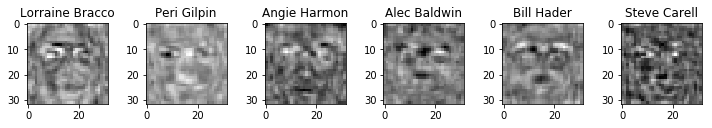

In [25]:
act =['Lorraine Bracco', 'Peri Gilpin', 'Angie Harmon', 'Alec Baldwin', 'Bill Hader', 'Steve Carell']
f, axarr = plt.subplots(1,len(act))

for i in range(len(act)):
    weight = past_weights[-1][:-1,i]
    weight = weight.reshape((32,32))
    axarr[i].imshow(weight)
    axarr[i].set_title(act[i])
plt.tight_layout()


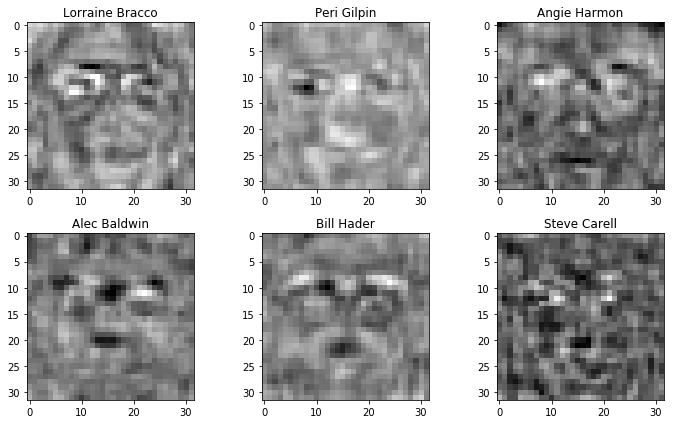

In [26]:
#Making Bigger Pictures
act =['Lorraine Bracco', 'Peri Gilpin', 'Angie Harmon', 'Alec Baldwin', 'Bill Hader', 'Steve Carell']
f, axarr = plt.subplots(2, 3)
#plt.figure(figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

for i in range(3):
    weight = past_weights[-1][:-1,i]
    weight = weight.reshape((32,32))
    axarr[0,i].imshow(weight)
    axarr[0,i].set_title(act[i])
    
for i in range(3):
    weight = past_weights[-1][:-1,i+3]
    weight = weight.reshape((32,32))
    axarr[1,i].imshow(weight)
    axarr[1,i].set_title(act[i+3]) 
    
plt.tight_layout()
